In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
pip install pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the dataset (replace 'your_dataset.csv' with your file)
df = pd.read_csv("Leukemia_GSE9476.csv")
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,PBSC_CD34,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,PBSC_CD34,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,PBSC_CD34,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,PBSC_CD34,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


In [5]:
# Preprocess the data
X = df.drop('type', axis=1)  # Replace 'target_column' with your target variable
y = df['type']

In [6]:
print(df["type"].unique())

['Bone_Marrow_CD34' 'Bone_Marrow' 'AML' 'PB' 'PBSC_CD34']


In [7]:
df["type"] = df["type"].replace({"Bone_Marrow_CD34":0,

                                                           "Bone_Marrow": 1,

                                                           "AML": 2,

                                                           "PB": 3,

                                                           "PBSC_CD34":4

                                                           })

df["type"] = df["type"].astype("category")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12292\400042875.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["type"] = df["type"].replace({"Bone_Marrow_CD34":0,


In [8]:
print(df["type"].unique())

[0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features (for models sensitive to feature scaling like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import xgboost as xgb

In [12]:
# Dictionary to store models and their performance
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [13]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)



# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train_df = pd.DataFrame(X_train, columns=X.columns)

X_test_df = pd.DataFrame(X_test, columns=X.columns)



print("X_train shape:", X_train.shape)

print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)

print("y_test shape:", y_test.shape)

X_train shape: (44, 22284)
y_train shape: (44,)
X_test shape: (20, 22284)
y_test shape: (20,)


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [17]:
# Train-test split with encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
# Train each model and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Decode predictions and actual labels back to original classes for evaluation
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print("\n")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 1.0000
                  precision    recall  f1-score   support

             AML       1.00      1.00      1.00         3
     Bone_Marrow       1.00      1.00      1.00         3
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      1.00      1.00         2
       PBSC_CD34       1.00      1.00      1.00         3

        accuracy                           1.00        13
       macro avg       1.00      1.00      1.00        13
    weighted avg       1.00      1.00      1.00        13



--- KNN ---
Accuracy: 0.9231
                  precision    recall  f1-score   support

             AML       1.00      0.67      0.80         3
     Bone_Marrow       1.00      1.00      1.00         3
Bone_Marrow_CD34       1.00      1.00      1.00         2
              PB       1.00      1.00      1.00         2
       PBSC_CD34       0.75      1.00      0.86         3

        accuracy                           0.92  

In [19]:
# Read the data and check its structure
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Leukemia_GSE9476.csv')
print("Data shape:", df.shape)
print("\
First few rows:")
print(df.head())

Data shape: (64, 22285)
First few rows:
   samples              type  1007_s_at   1053_at     117_at    121_at  \
0        1  Bone_Marrow_CD34   7.745245  7.811210   6.477916  8.841506   
1       12  Bone_Marrow_CD34   8.087252  7.240673   8.584648  8.983571   
2       13  Bone_Marrow_CD34   7.792056  7.549368  11.053504  8.909703   
3       14  Bone_Marrow_CD34   7.767265  7.094460  11.816433  8.994654   
4       15  Bone_Marrow_CD34   8.010117  7.405281   6.656049  9.050682   

   1255_g_at   1294_at   1316_at   1320_at  ...  AFFX-r2-Hs28SrRNA-5_at  \
0   4.546941  7.957714  5.344999  4.673364  ...                5.058849   
1   4.548934  8.011652  5.579647  4.828184  ...                4.436153   
2   4.549328  8.237099  5.406489  4.615572  ...                4.392061   
3   4.697018  8.283412  5.582195  4.903684  ...                4.633334   
4   4.514986  8.377046  5.493713  4.860754  ...                5.305192   

   AFFX-r2-Hs28SrRNA-M_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5

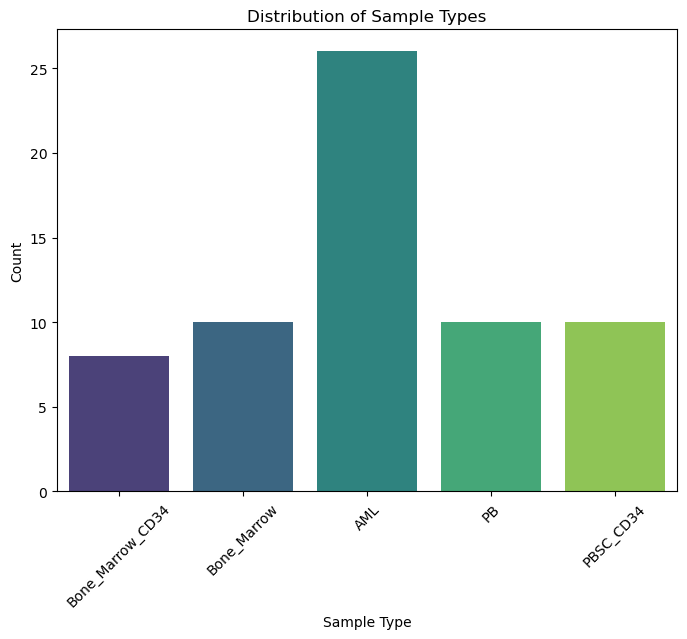

In [20]:
# 1. Distribution of Sample Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Sample Types')
plt.xlabel('Sample Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

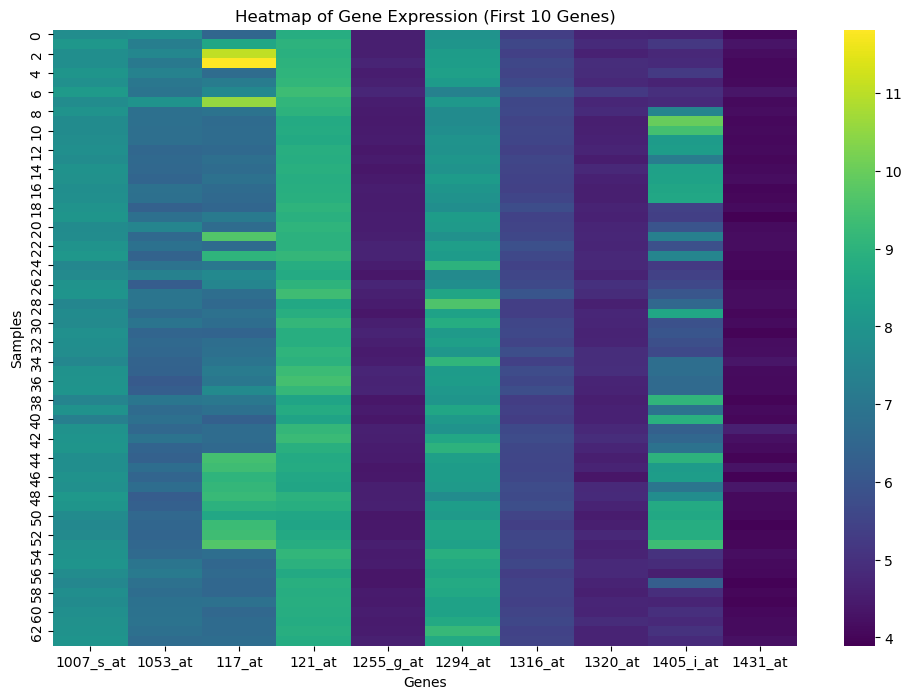

In [21]:
# 2. Heatmap of Gene Expression (selecting a subset of genes for visualization)
# Selecting the first 10 genes for simplicity
selected_genes = df.columns[2:12]  # Skipping 'samples' and 'type'

plt.figure(figsize=(12, 8))
sns.heatmap(df[selected_genes].astype(float), cmap='viridis', cbar=True)
plt.title('Heatmap of Gene Expression (First 10 Genes)')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.show()

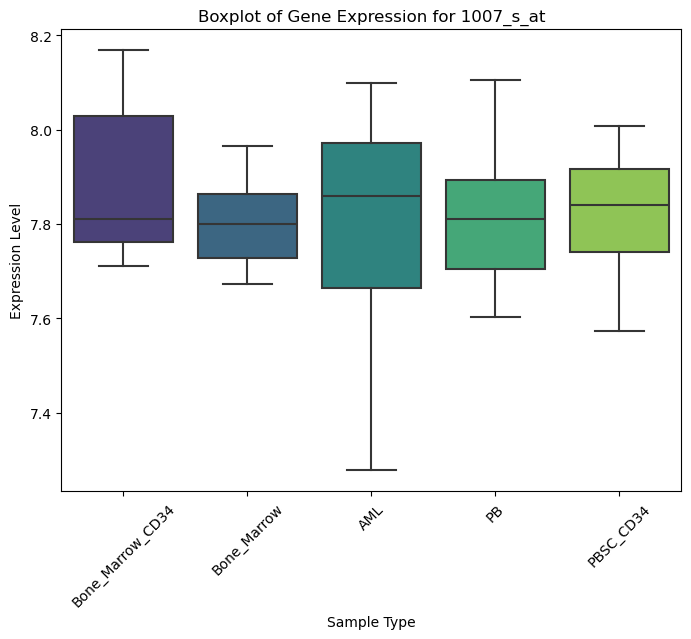

In [22]:
# 3. Boxplot of Gene Expression for a Specific Gene (e.g., the first gene)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='1007_s_at', palette='viridis')
plt.title('Boxplot of Gene Expression for 1007_s_at')
plt.xlabel('Sample Type')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)
plt.show()

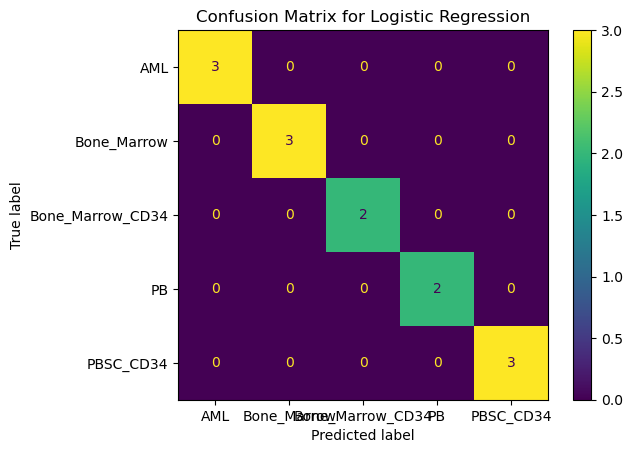

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

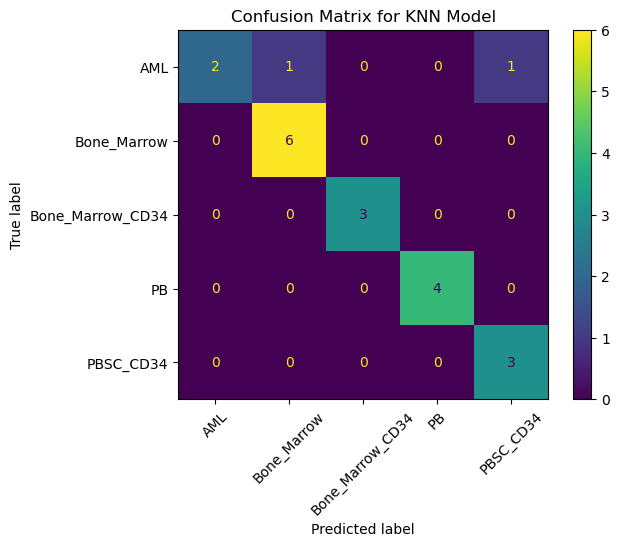

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title('Confusion Matrix for KNN Model')
plt.show()

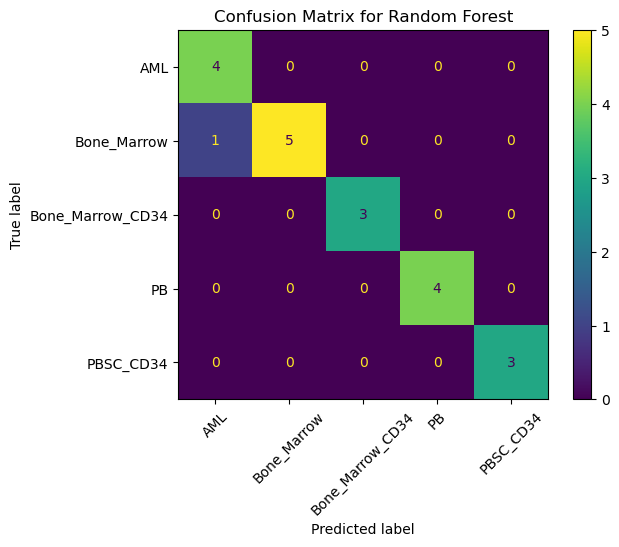

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X = df.iloc[:, 2:]  # Features
y = df['type']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [26]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [27]:
from xgboost import XGBClassifier


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


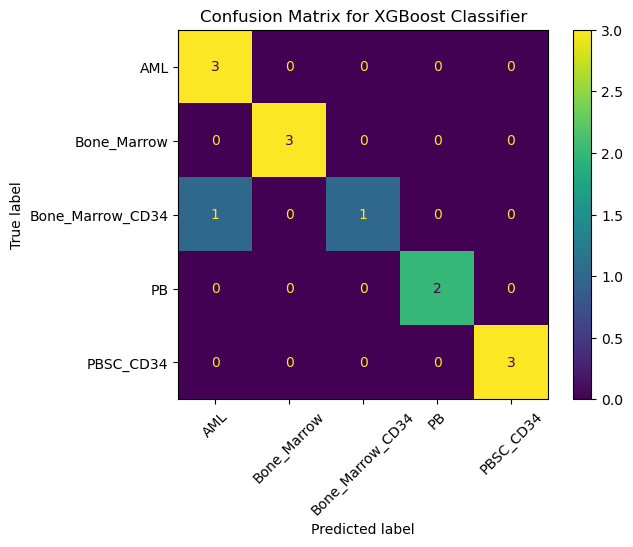

In [28]:
# Encode the target labels into numeric values
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data again with encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the XGBoost classifier again
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

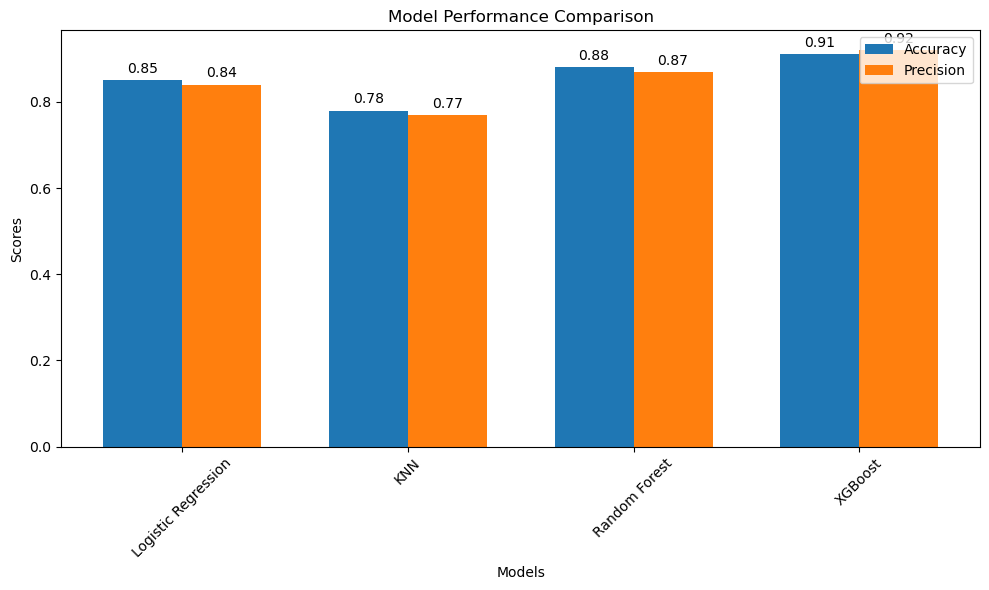

Model with the highest Accuracy: XGBoost
Model with the highest Precision: XGBoost


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define performance data
performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.85, 0.78, 0.88, 0.91],
    'Precision': [0.84, 0.77, 0.87, 0.92]
})

# Identify models with the highest accuracy and precision
best_accuracy_model = performance_df.loc[performance_df['Accuracy'].idxmax(), 'Model']
best_precision_model = performance_df.loc[performance_df['Precision'].idxmax(), 'Model']

# Prepare data for plotting
x = np.arange(len(performance_df['Model']))  # Label locations
width = 0.35  # Width of bars

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for accuracy and precision
rects1 = ax.bar(x - width/2, performance_df['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x + width/2, performance_df['Precision'], width, label='Precision')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(performance_df['Model'], rotation=45)
ax.legend()

# Function to annotate bars with values
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate bars
add_labels(rects1)
add_labels(rects2)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print the model with the highest metrics
print(f"Model with the highest Accuracy: {best_accuracy_model}")
print(f"Model with the highest Precision: {best_precision_model}")


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


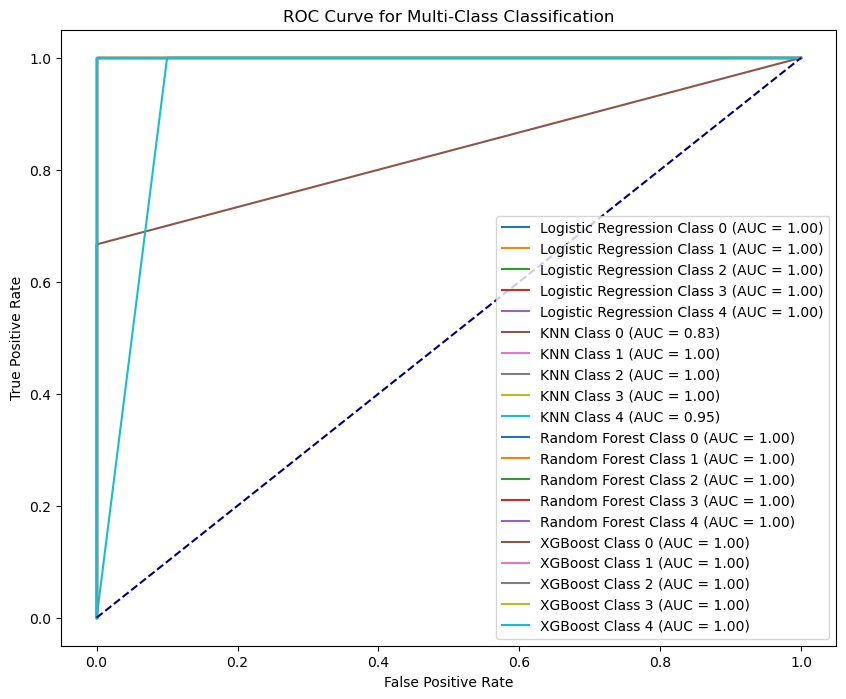

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define unique classes
unique_classes = df['type'].unique()

# Binarize the target variable for the test set
y_bin = label_binarize(y_test, classes=range(len(unique_classes)))  # Adjust based on the number of classes

# Initialize the plot
plt.figure(figsize=(10, 8))

# Train models and generate ROC curves for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)  # Predicted probabilities on the test set

    # Compute ROC curve and ROC area for each class
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} Class {i} (AUC = {roc_auc:.2f})')

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Add plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


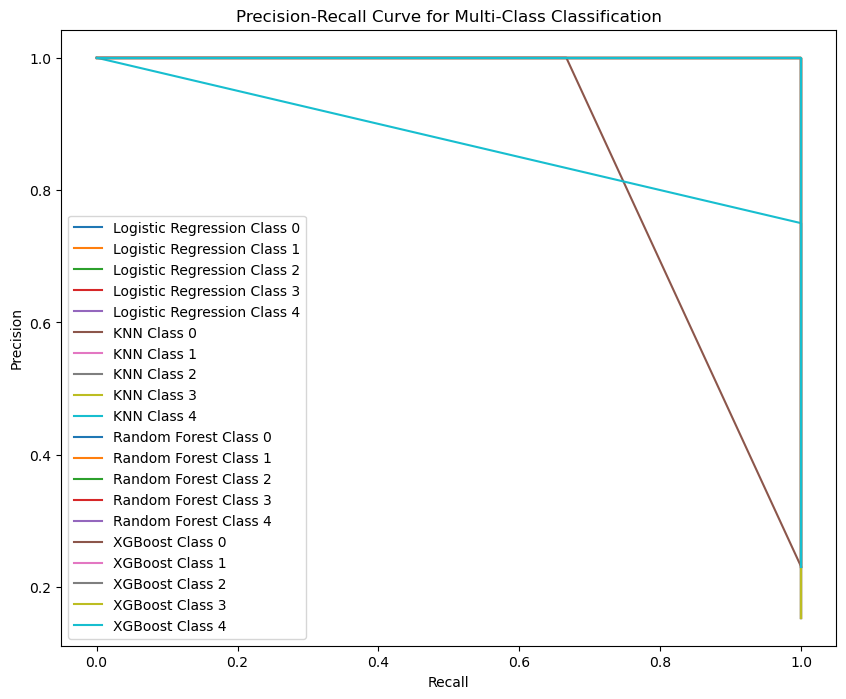

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define unique classes
unique_classes = df['type'].unique()

# Binarize the target variable for the test set
y_bin = label_binarize(y_test, classes=range(len(unique_classes)))  # Adjust based on the number of classes

# Initialize the plot
plt.figure(figsize=(10, 8))

# Generate Precision-Recall curves for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)  # Predicted probabilities on the test set

    # Compute Precision-Recall curve for each class
    for i in range(y_bin.shape[1]):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], y_prob[:, i])
        plt.plot(recall, precision, label=f'{model_name} Class {i}')

# Add plot labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()


In [41]:
def evaluate_models(models, X_train, X_test, y_train, y_test, problem_type='classification'):
    """
    Evaluate and compare the performance of multiple models.

    Parameters:
    - models: dict, model names as keys and model instances as values.
    - X_train, X_test, y_train, y_test: Training and test datasets.
    - problem_type: str, 'classification' (default) or 'regression'.

    Returns:
    - pd.DataFrame, performance metrics for each model.
    """
    performance_results = []

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        metrics = {"Model": name}

        if problem_type == 'classification':
            # Check if `predict_proba` is available
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)
                if y_prob.ndim > 1 and y_prob.shape[1] > 1:  # Multiclass case
                    # Handle AUC-ROC for multiclass
                    from sklearn.preprocessing import label_binarize
                    from sklearn.metrics import roc_auc_score

                    y_test_binarized = label_binarize(y_test, classes=list(range(y_prob.shape[1])))
                    metrics["AUC-ROC"] = roc_auc_score(y_test_binarized, y_prob, average="weighted", multi_class="ovr")
                else:
                    # Binary classification case
                    y_prob = y_prob[:, 1]
                    metrics["AUC-ROC"] = roc_auc_score(y_test, y_prob)
            else:
                metrics["AUC-ROC"] = "N/A"  # If `predict_proba` is unavailable
            
            # Calculate other metrics
            metrics.update({
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred, average='weighted'),
                "Recall": recall_score(y_test, y_pred, average='weighted'),
                "F1-Score": f1_score(y_test, y_pred, average='weighted')
            })

        performance_results.append(metrics)

    return pd.DataFrame(performance_results)
# Evaluate the models
performance_df = evaluate_models(models, X_train, X_test, y_train, y_test)
print(performance_df)

# Identify the best model based on accuracy
best_model = performance_df.loc[performance_df['Accuracy'].idxmax(), 'Model']
print(f"The best model based on accuracy is: {best_model}")

# Identify the best model based on precision
best_model = performance_df.loc[performance_df['Precision'].idxmax(), 'Model']
print(f"The best model based on precision is: {best_model}")


                 Model  AUC-ROC  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression      1.0       1.0        1.0     1.0       1.0
1                  KNN      1.0       1.0        1.0     1.0       1.0
2        Random Forest      1.0       1.0        1.0     1.0       1.0
3              XGBoost      1.0       1.0        1.0     1.0       1.0
The best model based on accuracy is: Logistic Regression
The best model based on precision is: Logistic Regression
